Object detection using MobileNetSSDv3 as the object detection model

In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
configfile = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
#Loading Tensorflow Pre-trained mmodel
model = cv2.dnn_DetectionModel(frozen_model,configfile)

In [5]:
#Generate empty array of labels
classLabels = [] 
filename = 'Labels.txt'
#assigns Labels to labels array
with open(filename, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [8]:
#Model Setup
#image size
model.setInputSize(320,320) 
#grey level
model.setInputScale(1.0/127.5)
#mobilenet => [-1,1]
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 00000179C22B0890>

Read an Image

In [9]:
img = cv2.imread('racing.jpg')

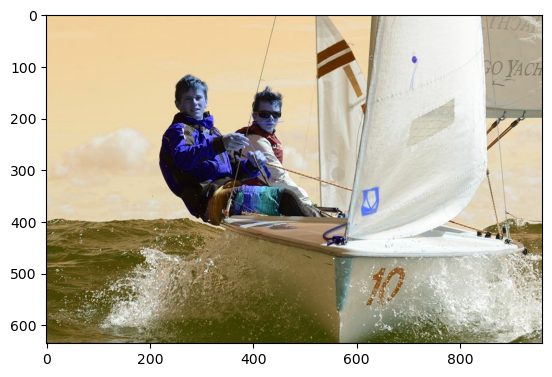

In [10]:
plt.imshow(img)

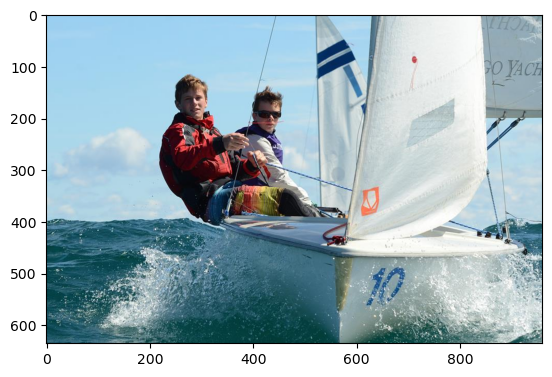

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [12]:
#Detects Objects In Image using openCV 
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [13]:
print(ClassIndex)

[1 1 9]


In [14]:
font_scale = 2
font = cv2.FONT_HERSHEY_PLAIN
#Adds Boxes & Labels to Objects
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
                                   cv2.rectangle(img, boxes, (255,0,0), 2)
                                   cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale =font_scale, color = (255, 0, 0), thickness =4)


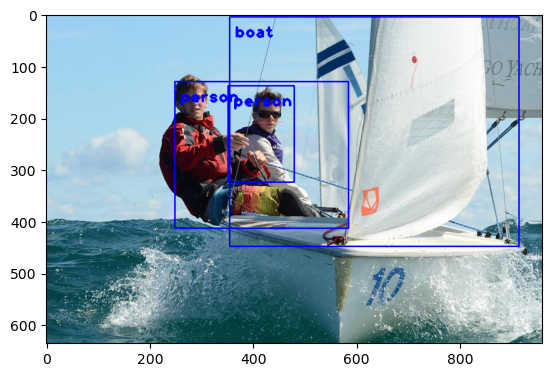

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Video

In [16]:
cap = cv2.VideoCapture("LondonWalking.mp4")

#check if no video, open default camera
if not cap.isOpened():
    cap = cv2.VideoCapture(0)

#if video does not open print error
if not cap.isOpened():
    raise IOError('ERROR: Video Not Opened')

#infinetly captures videos frames
while True:
    ret,frame = cap.read()
    
    if not ret or frame is None:
        print("Error: Empty or invalid frame. Exiting.")
        break
    
    #detects object in each frame
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if(ClassInd <= 80):
                cv2.rectangle(frame, boxes, (255,0,0), 2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale =font_scale, color = (255, 0, 0), thickness =4)
        cv2.imshow('Object Detection', frame)
    
        if cv2.waitKey(2) & 0xFF == ord('q'):
           break
    
cap.release()    
cv2.destoryAllWindows()
            

[1 1 3 1 1 3]
[ 1  1  1  1  1  1  3 28]
[ 1  1  1  1  1 28  1  3]
[ 1  1  1  1 28  3  1]
[ 1  1 28  3  1  1]
[ 1  1  1  3 28  1  1]
[ 1  1  1  3  1 28  1]
[ 1  1  1  3 28  1  1  1]
[ 1  3  1  1  1  1 28]
[3 1 1 1 1]
[3 1 1 1 1 1]
[1 3 1 1 1]
[1 3 1]
[1 3 1 1]
[1 3 1 3 1]
[ 1  3  1 28  1]
[ 3  1  1  3 28]
[3 1 1 1]
[ 1  3  1 28  1]
[ 1  1  3 28  1  1  1]
[1 1 3 1]
[1 1 3 3 3]
[3 1 1 3 3 1]
[ 3  1  1  3  3  2 28  3]
[ 3  1  1  2  3  3  1 28  1]
[ 3  1 28  1  2]
[ 1  1  3 28  2  3  3 28]
[ 1  1  3 28  2  3  3  1]
[ 1  1  3 28  2  3  1  3]
[ 1 28  1  3  3  2  3  3]
[ 1 28  3  2  1  1]
[ 1  2  1 28  3  1]
[ 1  1 28  3 28  1  2]
[ 1  1 28  1]
[ 1  1 28  1 28  3]
[ 1 28  1  1]
[ 1 28  1  1]
[ 1 28  1  1]
[ 1 28  1  1  1]
[ 1 28  1  1]
[ 1 28  1]
[ 1 28  1]
[ 1 28  1  1  1 28]
[ 1 28  1  1  1]
[ 1 28  1  1]
[ 1  1 28  3  3]
[ 1  1 28  3  3]
[ 1  1 28  3  1]
[ 1  1 28  3]
[ 1  1 28]
[ 1  1 28]
[ 1  1 28]
[ 1  1 28]
[ 1 28  1  3  3]
[ 1 28  1  3  3]
[ 1 28  1  3]
[ 1 28  3  3  1]
[ 1  1 28  3]
[

AttributeError: module 'cv2' has no attribute 'destoryAllWindows'